In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

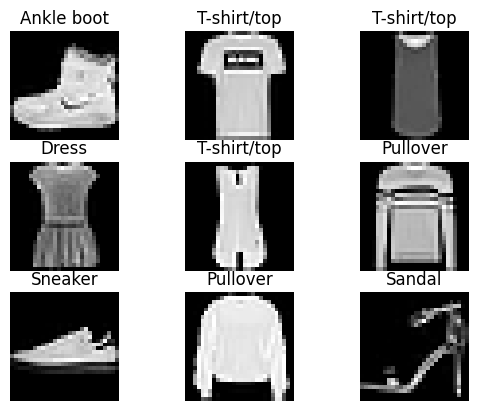

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [5]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),  # Reduced from 0.1
    tf.keras.layers.RandomZoom(0.05),      # Reduced from 0.1
])


inputs = tf.keras.layers.Input(shape=(28, 28, 1))
x = data_augmentation(inputs)  # Augmentation applied here

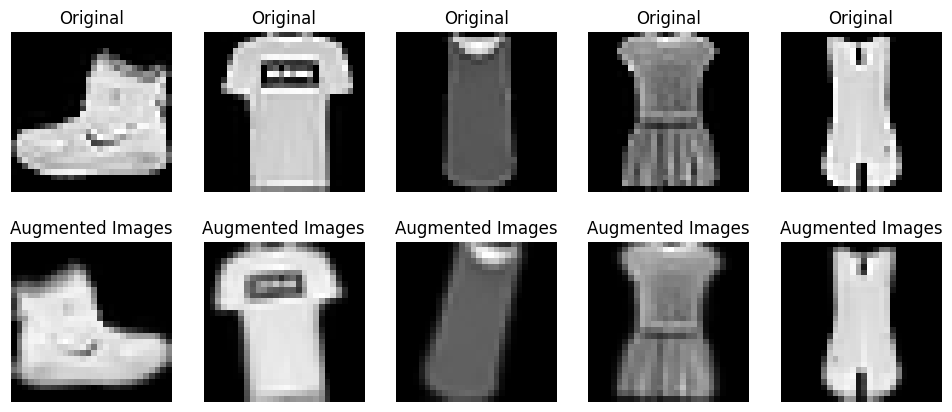

In [6]:
plt.figure(figsize=(12, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(tf.squeeze(x_train[i:i+1]), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    img = data_augmentation(x_train[i:i+1])
    plt.subplot(2, 5, i + 6)
    plt.imshow(tf.squeeze(img), cmap="gray")
    plt.axis("off")
    plt.title("Augmented Images")
plt.show()

In [7]:
def create_cnn_model(use_augmentation=False):
    model = models.Sequential()
    model.add(layers.Input(shape=(28,28,1)))

    if use_augmentation:
        model.add(data_augmentation)

    model.add(layers.Conv2D(32, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [8]:
model_no_aug = create_cnn_model(use_augmentation=False)
history_no_aug = model_no_aug.fit(x_train, y_train,
                                  epochs=10,
                                  validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8346 - loss: 0.4649 - val_accuracy: 0.8752 - val_loss: 0.3491
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8863 - loss: 0.3119 - val_accuracy: 0.8830 - val_loss: 0.3131
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9022 - loss: 0.2664 - val_accuracy: 0.8995 - val_loss: 0.2707
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9136 - loss: 0.2326 - val_accuracy: 0.9067 - val_loss: 0.2568
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9226 - loss: 0.2091 - val_accuracy: 0.9096 - val_loss: 0.2430
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9312 - loss: 0.1835 - val_accuracy: 0.9142 - val_loss: 0.2405
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9394 - loss: 0.1625 - val_accuracy: 0.9099 - val_loss: 0.2472
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9467 -

In [9]:
x_train_reshaped = x_train.reshape(-1, 28, 28, 1)
model_aug = create_cnn_model(use_augmentation=True)
history_aug = model_aug.fit(x_train_reshaped, y_train,
                            epochs=10,
                            validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7762 - loss: 0.6064 - val_accuracy: 0.8368 - val_loss: 0.4349
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8444 - loss: 0.4201 - val_accuracy: 0.8582 - val_loss: 0.3931
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8651 - loss: 0.3674 - val_accuracy: 0.8602 - val_loss: 0.3944
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8751 - loss: 0.3343 - val_accuracy: 0.8575 - val_loss: 0.3844
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8846 - loss: 0.3149 - val_accuracy: 0.8899 - val_loss: 0.3109
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8912 - loss: 0.2963 - val_accuracy: 0.8827 - val_loss: 0.3305
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8947 - loss: 0.2845 - val_accuracy: 0.8944 - val_loss: 0.3000
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8991 -

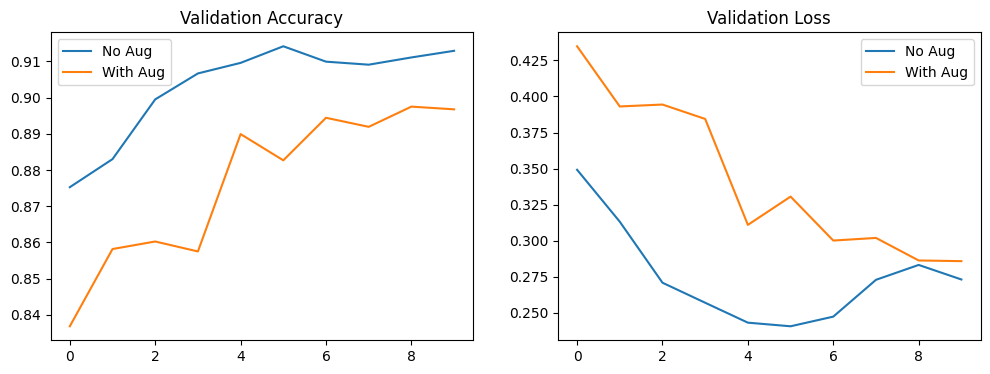

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_no_aug.history['val_accuracy'], label='No Aug')
plt.plot(history_aug.history['val_accuracy'], label='With Aug')
plt.title('Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_no_aug.history['val_loss'], label='No Aug')
plt.plot(history_aug.history['val_loss'], label='With Aug')
plt.title('Validation Loss')
plt.legend()

plt.show()